In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
import matplotlib.image as mpimg


In [51]:
#read tags
f = open('imgs/tags.txt', 'r')
tags = f.readlines()
f.close()
for i in range(0,len(tags)):
    tags[i] = tags[i][:-2]

In [55]:
#define dataset
sample_size = 120
feature_size = 15
x_train = []
y_train = tags[:sample_size]

In [56]:
#install module with following bash
''' 
sudo su
pip install colorgram.py
pip3 install colorgram.py
'''
import colorgram
for index in range(0,sample_size):

    image = imread('imgs/'+str(index)+'.jpg', as_gray=True)
    colors = colorgram.extract('imgs/'+str(index)+'.jpg',image.shape[0]*image.shape[1])

    colors.sort(key=lambda c: c.hsl.h)
    print(len(colors))
    print(colors[0])
    cur_feature = []
    for i in range(0,feature_size):
        cur_feature.append(colors[i].rgb.r)
        cur_feature.append(colors[i].rgb.g)
        cur_feature.append(colors[i].rgb.b)
        cur_feature.append(colors[i].hsl.h)
        cur_feature.append(colors[i].hsl.s)
        cur_feature.append(colors[i].hsl.l)
        cur_feature.append(colors[i].proportion)
    x_train.append(cur_feature)

22
<colorgram.py Color: Rgb(r=249, g=248, b=248), 31.32983606557377%>
32
<colorgram.py Color: Rgb(r=152, g=117, b=112), 0.3095537586103624%>
25
<colorgram.py Color: Rgb(r=90, g=51, b=51), 0.0009209314563873175%>
35
<colorgram.py Color: Rgb(r=92, g=50, b=47), 2.076197053406998%>
34
<colorgram.py Color: Rgb(r=180, g=105, b=92), 0.0841803820373226%>
18
<colorgram.py Color: Rgb(r=140, g=95, b=81), 0.3455190771960958%>
22
<colorgram.py Color: Rgb(r=157, g=113, b=110), 0.01902587519025875%>
35
<colorgram.py Color: Rgb(r=154, g=24, b=21), 0.021556256572029444%>
19
<colorgram.py Color: Rgb(r=229, g=173, b=168), 0.14032983508245878%>
34
<colorgram.py Color: Rgb(r=114, g=42, b=36), 0.5349159663865546%>
29
<colorgram.py Color: Rgb(r=96, g=53, b=44), 0.44593881856540085%>
21
<colorgram.py Color: Rgb(r=247, g=245, b=245), 41.556369426751594%>
31
<colorgram.py Color: Rgb(r=94, g=49, b=47), 0.0012883194516912415%>
31
<colorgram.py Color: Rgb(r=212, g=93, b=63), 2.4190123456790125%>
22
<colorgram.py C

34
<colorgram.py Color: Rgb(r=139, g=35, b=26), 1.4017729061683895%>


In [58]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
mod = linear_model.LogisticRegression(penalty='l2',C=1,random_state=423)
mod.fit(x_train, y_train) 
y_pred = mod.predict(x_train)
print("logistic regression: ")
print("train accuracy: ",accuracy_score(y_train,y_pred))

logistic regression: 
valid accuracy:  1.0


In [69]:
from PIL import Image
import requests
from io import BytesIO

#validation
f = open('imgs/valid_x.txt', 'r')
valid_url = f.readlines()
f.close()
for i in range(0,len(valid_url)):
    valid_url[i] = valid_url[i][:-1]

f = open('imgs/valid_y.txt', 'r')
valid_y = f.readlines()
f.close()
for i in range(0,len(valid_y)):
    valid_y[i] = valid_y[i][:-2]

valid_size = 10

x_valid = []
y_valid = valid_y
for index in range(0,valid_size):
    response = requests.get(valid_url[index])
    image = Image.open(BytesIO(response.content))
    #image = imread(valid_url[index], as_gray=True)
    colors = colorgram.extract(image,image.size[0]*image.size[1])

    colors.sort(key=lambda c: c.hsl.h)
    print(len(colors))
    print(colors[0])
    cur_feature = []
    for i in range(0,feature_size):
        cur_feature.append(colors[i].rgb.r)
        cur_feature.append(colors[i].rgb.g)
        cur_feature.append(colors[i].rgb.b)
        cur_feature.append(colors[i].hsl.h)
        cur_feature.append(colors[i].hsl.s)
        cur_feature.append(colors[i].hsl.l)
        cur_feature.append(colors[i].proportion)
    x_valid.append(cur_feature)

21
<colorgram.py Color: Rgb(r=154, g=114, b=110), 0.001007302946361118%>
26
<colorgram.py Color: Rgb(r=79, g=45, b=44), 0.0003333333333333333%>
26
<colorgram.py Color: Rgb(r=254, g=254, b=254), 5.280457010390363%>
29
<colorgram.py Color: Rgb(r=97, g=52, b=52), 0.004538363352715927%>
34
<colorgram.py Color: Rgb(r=156, g=34, b=30), 0.10424045651318378%>
21
<colorgram.py Color: Rgb(r=138, g=92, b=89), 0.020240137221269296%>
21
<colorgram.py Color: Rgb(r=60, g=43, b=42), 5.327828947368421%>
36
<colorgram.py Color: Rgb(r=119, g=40, b=26), 1.0953932061423917%>
20
<colorgram.py Color: Rgb(r=201, g=98, b=76), 1.860030864197531%>
29
<colorgram.py Color: Rgb(r=146, g=119, b=115), 0.03428518036265432%>


reference art from creater 79


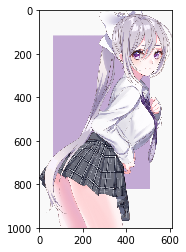

logistic regression: 
train accuracy:  0.4
prediction detail:
prediction:  897 truth:  7
image


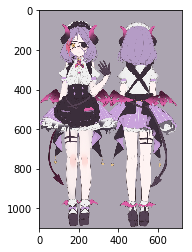

prediction:  7 truth:  7
image


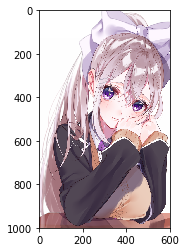

prediction:  1729 truth:  7
image


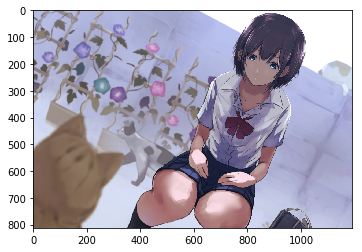

prediction:  897 truth:  7
image


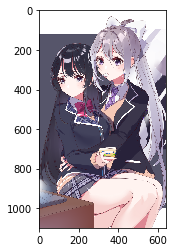

prediction:  7 truth:  7
image


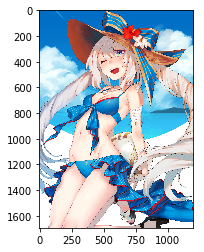

prediction:  7 truth:  7
image


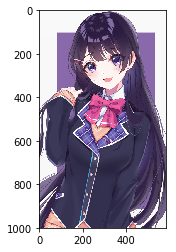

prediction:  1729 truth:  7
image


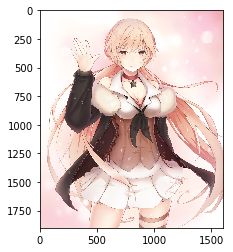

prediction:  1521 truth:  7
image


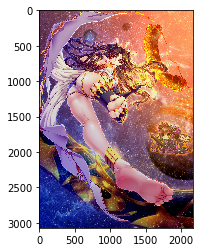

prediction:  7 truth:  7
image


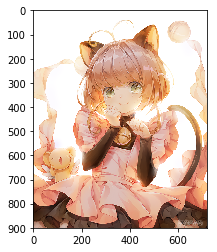

prediction:  872 truth:  7
image


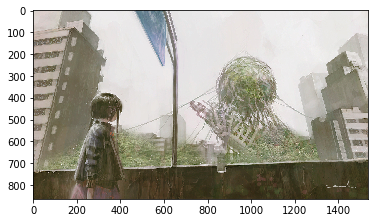

In [78]:
#validation
print("reference art from creater 79")
img=mpimg.imread('imgs/0.jpg')
imgplot = plt.imshow(img)
plt.show()

y_pred = mod.predict(x_valid)
print("logistic regression: ")
print("train accuracy: ",accuracy_score(y_valid[:valid_size],y_pred))
print("prediction detail:")
for i in range(0,valid_size):
    print("prediction: ",y_pred[i],"truth: ",y_valid[i])
    print("image")
    response = requests.get(valid_url[i])
    image = Image.open(BytesIO(response.content))
    imgplot = plt.imshow(image)
    plt.show()